In [1]:
#importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('ALL PRICES - NHC PROJECTS.xlsx',sheet_name=1)

In [3]:
df.head()

,PROJECT_NAME,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_1,PRICE_2,LATITUDE,LONGITUDE
0,KONGWA,2,56.0,normal,35492580.0,41881244.4,-6.2000,36.4170
1,KONGWA,3,70.0,normal,39835800.0,47006244.0,-6.2000,36.4170
2,KONGWA,3,56.0,normal,40166280.0,47396210.4,-6.2000,36.4170
3,MKUZO,2,56.0,normal,36310680.0,42846602.4,-10.6425,35.6317
4,MKUZO,3,70.0,normal,41727960.0,49238992.8,-10.6425,35.6317


In [4]:
#reshuffling the data
df_shuf=df.sample(frac=1).reset_index(drop=True)

In [5]:
df_shuf.head()

,PROJECT_NAME,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_1,PRICE_2,LATITUDE,LONGITUDE
0,Morocco Square - Dar es Salaam,3,154.0,Apartment,5.400000e+08,637200000.0,-6.776012,39.178326
1,Seven Eleven - Dar es Salaam,2,140.0,Apartment,3.465000e+08,408870000.0,-6.723100,39.229900
2,Momba - Mbeya,3,151.0,normal,1.494900e+08,176398200.0,-8.148100,33.259400
3,Morocco Square - Dar es Salaam,3,154.0,Apartment,5.317875e+08,627509250.0,-6.776012,39.178326
4,MKUZO,3,85.0,normal,4.439124e+07,52381663.0,-10.642500,35.631700


<AxesSubplot:>

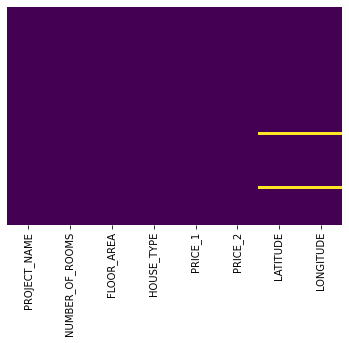

In [6]:
#visualizing the missing values present in the dataframe
sns.heatmap(df_shuf.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
#conversion of categorical data to numerical values via direct mapping

scale_mapper= {'normal':1, 'Apartment':2}
df_shuf['HOUSE_TYPE'].replace(scale_mapper, inplace=True)

In [8]:
df_shuf['HOUSE_TYPE'].value_counts()

1    60
2    25
Name: HOUSE_TYPE, dtype: int64

In [9]:
df_shuf.head()

,PROJECT_NAME,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_1,PRICE_2,LATITUDE,LONGITUDE
0,Morocco Square - Dar es Salaam,3,154.0,2,5.400000e+08,637200000.0,-6.776012,39.178326
1,Seven Eleven - Dar es Salaam,2,140.0,2,3.465000e+08,408870000.0,-6.723100,39.229900
2,Momba - Mbeya,3,151.0,1,1.494900e+08,176398200.0,-8.148100,33.259400
3,Morocco Square - Dar es Salaam,3,154.0,2,5.317875e+08,627509250.0,-6.776012,39.178326
4,MKUZO,3,85.0,1,4.439124e+07,52381663.0,-10.642500,35.631700


In [10]:
#dropping string columns and additional price column
new_df = df_shuf.drop(columns=['PROJECT_NAME','PRICE_1'], axis=1)

In [11]:
new_df.head(2)

,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_2,LATITUDE,LONGITUDE
0,3,154.0,2,637200000.0,-6.776012,39.178326
1,2,140.0,2,408870000.0,-6.723100,39.229900


In [12]:
#filling the missing numerical values using the NN imputation method
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=20)

In [13]:
imput_df = imputer.fit_transform(new_df.values)
house_df = pd.DataFrame(imput_df, columns=new_df.columns)

<AxesSubplot:>

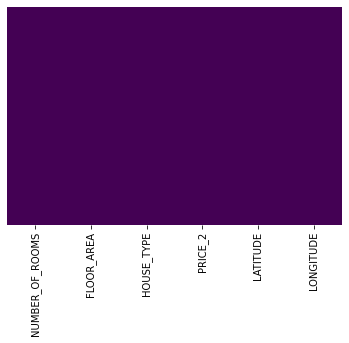

In [14]:
#visualizing the missing values present in the dataframe
sns.heatmap(house_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [15]:
#Standardizing the features using standard scaler for machine learning algorithms to understand
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
standardized_df = scaler.fit_transform(house_df)

In [16]:
#creating dataframe conducive for the ML algorithms
best_df = pd.DataFrame(standardized_df, columns=new_df.columns)

In [17]:
best_df.head()

,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_2,LATITUDE,LONGITUDE
0,0.245722,0.971937,1.549193,2.250620,-0.040594,0.838362
1,-1.653038,0.675817,1.549193,1.132591,-0.015910,0.856750
2,0.245722,0.908483,-0.645497,-0.005719,-0.680687,-1.271925
3,0.245722,0.971937,1.549193,2.203169,-0.040594,0.838362
4,0.245722,-0.487510,-0.645497,-0.612973,-1.844350,-0.426124


In [18]:
#checking correlation of each feature in relation to the price
corr_matrix = best_df.corr()
corr_matrix['PRICE_2'].sort_values(ascending=False)

PRICE_2            1.000000
FLOOR_AREA         0.864313
HOUSE_TYPE         0.746561
NUMBER_OF_ROOMS    0.533343
LONGITUDE          0.452649
LATITUDE          -0.011895
Name: PRICE_2, dtype: float64

<AxesSubplot:xlabel='FLOOR_AREA', ylabel='PRICE_2'>

<Figure size 1080x576 with 0 Axes>

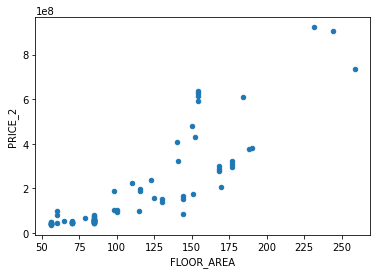

In [19]:
#plotting the most correlated feature against the price
plt.figure(figsize=(15,8))
house_df.plot(kind='scatter', x='FLOOR_AREA', y='PRICE_2', alpha=1)

/home/kb/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 864x576 with 0 Axes>

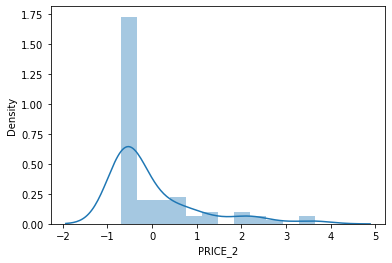

<Figure size 864x576 with 0 Axes>

In [20]:
#plotting the price distribution
sns.distplot(best_df.PRICE_2)
plt.figure(figsize=(12,8))

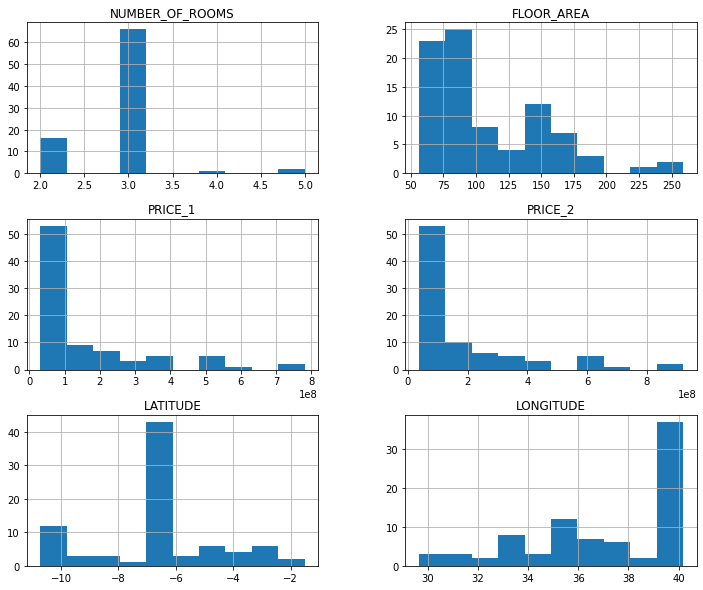

In [21]:
df.hist(figsize=(12,10))
plt.show()

In [22]:
df = pd.DataFrame(np.random.rand(50, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.036270,0.436778,0.541297
1,0.348569,0.326047,0.635616
2,0.537312,0.260884,0.454777
3,0.211519,0.434759,0.061797
4,0.328303,0.900737,0.747830


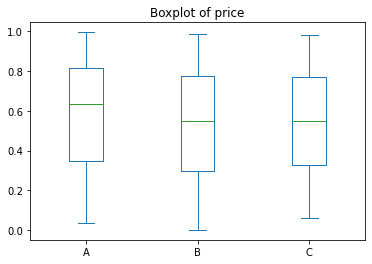

In [23]:
df.plot.box(title='Boxplot of price');


<AxesSubplot:>

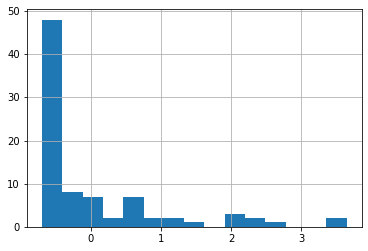

In [24]:
best_df['PRICE_2'].hist(bins=15)

<AxesSubplot:>

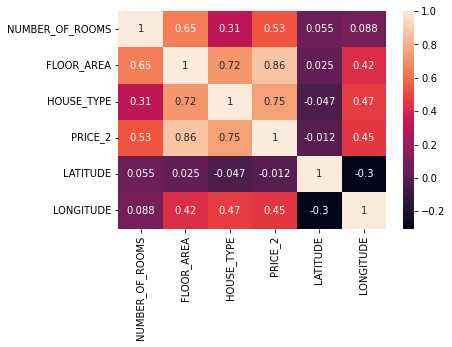

In [25]:
#heat map showing the correlation of features with respect to the price
sns.heatmap(best_df.corr(), annot=True)

In [26]:
#Assigning the features into X and Y 
X = best_df[['NUMBER_OF_ROOMS', 'FLOOR_AREA', 'HOUSE_TYPE', 'LATITUDE','LONGITUDE']]
y = best_df['PRICE_2']

In [27]:
#Splitting the features into training and test sets using scikit-learn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [28]:
#importing evaluation metrics of linear regression models
from sklearn import metrics

In [29]:
#Training using the linear regression Model
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()

In [30]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [31]:
lr_pred = linear_regression.predict(X_test)

In [32]:
print(np.sqrt(metrics.mean_squared_error(y_test, lr_pred))) #RMSE
print('\n')
print(metrics.r2_score(y_test,lr_pred)) #R2

0.5561978825302116


0.6404381269062689


In [33]:
#checking other model performance
from sklearn.linear_model import Lasso, ElasticNet, LogisticRegression, Ridge

In [34]:
#Lasso regression
lasso_regres = Lasso()
lasso_regres.fit(X_train,y_train)

Lasso()

In [35]:
lasso_pred = lasso_regres.predict(X_test)

In [36]:
print(np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))
print('\n')
print(metrics.r2_score(y_test,lasso_pred))

0.9400737595421733


-0.027161735666002107


In [37]:
#ElasticNetRegression
elastic = ElasticNet()
elastic.fit(X_train,y_train)
elastic_pred = elastic.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, elastic_pred)))
print('\n')
print(metrics.r2_score(y_test,elastic_pred))

0.7384687628869814


0.36616060153996033


In [38]:
# Ridge regression
ridge = Ridge()
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print('\n')
print(metrics.r2_score(y_test,ridge_pred))

0.5581917399703078


0.6378555923926195


In [39]:
#Training using the decision trees 
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)
dt_pred = dtree.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, dt_pred)))
print('\n')
print(metrics.r2_score(y_test,dt_pred))

0.4746206522070749


0.7381767343306798


In [40]:
#for random forests
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=30, random_state=20)
regressor.fit(X_train, y_train)
rfr_pred = regressor.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print('\n')
print(metrics.r2_score(y_test,rfr_pred))

0.38903877743749815


0.8240858576016541


/home/kb/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE_2', ylabel='Density'>

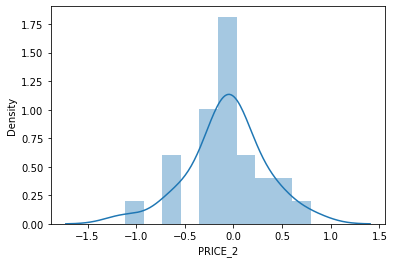

In [41]:
sns.distplot((y_test-rfr_pred))

In [42]:
#checking using the support vector regressor
from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train,y_train)
svr_pred = svr_regressor.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
print('\n')
print(metrics.r2_score(y_test,svr_pred))

0.6122830264669512


0.564268043386885


In [43]:
#Inversing the standardized features
inv_df=scaler.inverse_transform(standardized_df, copy=None)
nhc = pd.DataFrame(inv_df,columns=new_df.columns)

In [44]:
nhc.head()

,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_2,LATITUDE,LONGITUDE
0,3.0,154.0,2.0,637200000.0,-6.776012,39.178326
1,2.0,140.0,2.0,408870000.0,-6.723100,39.229900
2,3.0,151.0,1.0,176398200.0,-8.148100,33.259400
3,3.0,154.0,2.0,627509250.0,-6.776012,39.178326
4,3.0,85.0,1.0,52381663.0,-10.642500,35.631700


In [45]:
#Assigning the features into X and Y 
X_column= nhc[['NUMBER_OF_ROOMS', 'FLOOR_AREA', 'HOUSE_TYPE', 'LATITUDE','LONGITUDE']]
y_column = nhc['PRICE_2']

In [46]:
#Splitting the features into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_column, y_column, test_size=0.3, random_state=20)

In [47]:
#for random forests
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=30, random_state=20)
regressor.fit(X_train, y_train)
rfr_pred = regressor.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print('\n')
print(metrics.r2_score(y_test,rfr_pred))

77382184.47148551


0.8331303262847728


In [48]:
y_test[:3]

66    5.928615e+08
51    4.779000e+08
12    2.764176e+08
Name: PRICE_2, dtype: float64

In [49]:
rfr_pred[:3]

array([5.40010737e+08, 4.75287155e+08, 2.97042198e+08])

In [50]:
#Saving every other model
from json5 import dump, load

In [51]:
import pickle
with open('regressor_pkl', 'wb') as f:
    pickle.dump(regressor, f)

In [52]:
# pred = loaded_regressor.predict(X_test)

In [53]:
# pred[:5]

In [54]:
X_test

,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,LATITUDE,LONGITUDE
66,3.0,154.0,2.0,-6.776012,39.178326
51,3.0,150.0,2.0,-6.723100,39.229900
12,3.0,168.0,2.0,-6.796200,39.269300
83,3.0,130.0,1.0,-2.515400,32.973600
36,3.0,70.0,1.0,-10.658900,35.646000
44,3.0,85.0,1.0,-2.732200,36.695500
23,3.0,100.0,1.0,-3.302900,36.445300
0,3.0,154.0,2.0,-6.776012,39.178326
77,3.0,110.0,1.0,-10.265800,40.184600
45,2.0,56.0,1.0,-10.642500,35.631700
